In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
dataset = pd.read_csv('training.csv.gz')

In [ ]:
dataset.head()

In [14]:
dataset['Label'].unique()

array(['Muon', 'Ghost', 'Pion', 'Proton', 'Kaon', 'Electron'],
      dtype=object)

In [6]:
df = dataset.drop(dataset[dataset.Label == 'Muon' ].index)

In [7]:
df = df.drop(df[ df.Label =='Kaon' ].index)

In [8]:
df = df.drop(df[ df.Label =='Pion' ].index)

In [9]:
df = df.drop(df[ df.Label =='Proton' ].index)

In [10]:
df = df.drop(df[ df.Label =='Electron' ].index) 

In [1]:
#only rows we are left with are the ones with GHOST labels

In [24]:
df =df.drop(['Label'], axis =1)

In [25]:
df.shape

(200000, 49)

In [14]:
dfff = df.iloc[0:500,:]

In [23]:
dfff.shape

(500, 49)

# Mean Shift

In [49]:
# Mean Shift is the clustering algorithm we've used

In [17]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(dfff)

14956.586387303289

In [18]:
from sklearn.cluster import MeanShift             

analyzer = MeanShift(bandwidth=14956)

In [19]:
analyzer.fit(dfff)

MeanShift(bandwidth=14956, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [20]:
labels = analyzer.labels_

In [21]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [25]:
dfff['cluster_group'] = np.nan
data_length=len(dfff)
for i in range(data_length):
    dfff.iloc[i,dfff.columns.get_loc('cluster_group')] = labels[i]
dfff.head()

/home/maryam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/maryam/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/maryam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton,cluster_group
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400,1.0
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017,0.0
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000,0.0
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519,0.0
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087,0.0


In [26]:
print(dfff.groupby('cluster_group').size())

cluster_group
0.0     442
1.0       8
2.0      17
3.0       6
4.0       4
5.0       2
6.0       9
7.0       1
8.0       1
9.0       1
10.0      3
11.0      1
12.0      3
13.0      1
14.0      1
dtype: int64


In [27]:
cluster_data = dfff.groupby(['cluster_group']).mean()
#Count of passengers in each cluster
cluster_data['Counts'] = pd.Series(dfff.groupby(['cluster_group']).size())
cluster_data

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton,Counts
cluster_group,,,,,,,,,,,,,,,,,,,,,
0.0,9830.243778,14.984163,-169.446050,0.176471,0.864253,-122.022172,-154.306977,-13.151536,0.961538,-154.518106,...,0.950226,-40.862073,-39.875915,2307.790547,0.149321,0.823529,-113.685800,-39.380243,-39.372774,442
1.0,76425.623053,12.500000,-374.517207,0.625000,0.500000,-247.350000,-376.007723,3.914634,1.000000,-374.349478,...,1.000000,0.793448,-0.478990,880.785307,0.625000,1.000000,-120.452371,-0.129865,-5.758365,8
2.0,48331.844670,11.588235,-470.125277,0.411765,0.588235,-409.847059,-529.934592,-56.745668,0.941176,-528.396672,...,0.882353,-66.630894,-59.349147,1095.417333,0.352941,0.705882,-468.117078,-58.899988,-76.700305,17
3.0,97662.908854,14.000000,-166.482410,0.500000,1.000000,3.200000,-168.369590,2.780806,1.000000,-166.529406,...,1.000000,-1.033541,-0.440040,1733.449608,0.500000,0.833333,22.535992,-0.327174,-12.755940,6
4.0,56509.212891,12.250000,-0.019430,0.000000,1.000000,3.200000,3.458104,-2.657837,1.000000,-3.877142,...,1.000000,-7.525522,0.300203,201.509626,0.000000,1.000000,189.041799,0.307803,-15.692772,4
5.0,89825.886732,11.000000,-0.109551,0.000000,1.000000,3.200000,-1.372260,-4.245126,1.000000,-0.986712,...,1.000000,6.084792,-1.198158,22810.978516,0.000000,1.000000,15.359216,-0.509458,-19.651308,2
6.0,36979.355040,12.111111,-332.903247,0.222222,1.000000,1.777778,-113.205248,-4.516062,1.000000,-112.216467,...,1.000000,2.156595,-1.347472,30543.167320,0.111111,1.000000,3.016985,-0.401583,8.133384,9
7.0,324594.749992,7.000000,-999.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,1.000000,-999.000000,...,0.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,1
8.0,190444.375007,18.000000,-0.607505,0.000000,1.000000,3.200000,-1.861649,-2.723446,1.000000,0.689575,...,1.000000,-4.519522,0.581978,17196.949215,0.000000,1.000000,2.742701,0.207078,-15.344522,1


# Agglomerative

In [50]:
# agglomerative is the second clustering algorithm that we've used

In [28]:
Y = dfff.values

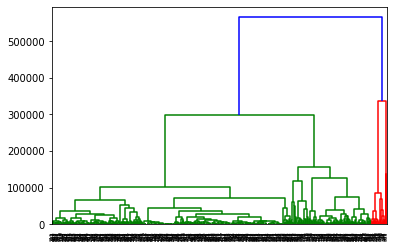

In [29]:
dendrogram = sch.dendrogram(sch.linkage(Y, method='ward'))

In [30]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(Y)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [31]:
labels = model.labels_

In [33]:
dff = df.iloc[0:500,:]

In [35]:
dff['cluster_group'] = np.nan
data_length=len(dff)
for i in range(data_length):
    dff.iloc[i,dff.columns.get_loc('cluster_group')] = labels[i]
dff.head()

/home/maryam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/maryam/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/maryam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton,cluster_group
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400,2.0
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017,3.0
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000,3.0
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519,0.0
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087,3.0


In [36]:
print(dff.groupby('cluster_group').size())

cluster_group
0.0    120
1.0      2
2.0     21
3.0    357
dtype: int64


In [37]:
cluster_data = dff.groupby(['cluster_group']).mean()
#Count of passengers in each cluster
cluster_data['Counts'] = pd.Series(dff.groupby(['cluster_group']).size())
cluster_data

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton,Counts
cluster_group,,,,,,,,,,,,,,,,,,,,,
0.0,28006.003224,13.416667,-291.142655,0.250000,0.841667,-114.123333,-167.090063,-8.920579,0.991667,-167.666278,...,0.983333,-18.588031,-8.255303,6291.133523,0.233333,0.958333,-96.926709,-8.051655,-16.907590,120
1.0,257519.562499,12.500000,-499.803752,0.000000,0.500000,-497.900000,-500.430824,-500.861723,1.000000,-499.155213,...,0.500000,-501.759761,-499.209011,8098.974608,0.000000,0.500000,-498.128649,-499.396461,-507.172261,2
2.0,82205.101007,12.285714,-332.919838,0.476190,0.714286,-187.695238,-334.409392,-45.665161,0.952381,-333.141646,...,0.952381,-46.357552,-48.064347,3772.544835,0.428571,0.857143,-180.333569,-47.814209,-58.681242,21
3.0,6782.028092,15.350140,-134.311077,0.154062,0.871148,-126.517647,-154.523625,-13.459488,0.955182,-154.630622,...,0.941176,-44.930031,-46.728234,1762.376620,0.123249,0.787115,-118.040206,-46.097692,-44.128219,357
